# Notes on Fitting Data

Here is another example of curve fitting. We will also calculate and plot residuals from the curve fit. You should always plot residuals as an important test of the fit of your mathematical model to the data.

## The Tools
As always, we must begin by importing the **tools** that we will be using. 

In [7]:
import scipy.optimize as opt      # we will load the optimize sublibrary from scipy
import scipy.stats as stats       # we will load the stats sublibrary from scipy
import numpy as np                # A library of math functions and data structure
import pandas as pd               # The dataframe and related methods and function.
import matplotlib.pyplot as plt   # A library of plotting functions

data_loc = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/data/"  # Data is on github
# data_loc = "data/"   # Data is in same folder as notebook

## Your Data

As before, we will create a data set. Here we **load the data** from a text file.

In [8]:
# Read a data file. It should be in the same directory as this notebook
print("Here is data read in from the data file as a data frame object")
xydata = pd.read_csv(data_loc + "2_3_Data.txt") 
print(xydata)                # Print the data 

Here is data read in from the data file as a data frame object
   Days  Zombies
0     0     1.00
1     2     1.75
2     7     8.13
3    14    71.10
4    17   165.00
5    19   306.00
6    21   521.00
7    22   744.00


## Plot The Data
First we will **plot the data**. It looks like exponential growth. Do you agree?

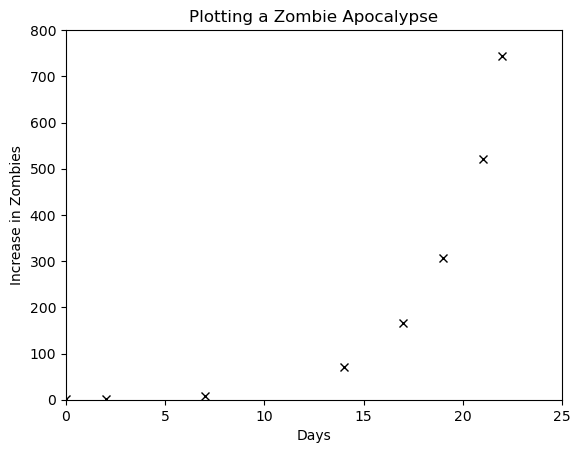

In [9]:
plt.plot(xydata["Days"], xydata["Zombies"], "kx")   # "k" = black, "x" = cross 

plt.title("Plotting a Zombie Apocalypse")           # Title of the plot         
plt.xlabel("Days")                                  # x-axis label   
plt.ylabel("Increase in Zombies")                   # y-axis label  

plt.ylim([0,800])
plt.xlim([0,25])
plt.show()                                          # show the plot

## Propose a Model

Are we doomed? First we must understand the data by **fitting it to a model**. This looks like exponential growth (we know that living things follow this model when resources are unlimited) so let us model that hypothesis and see if it is a good fit. The formula for exponential growth of a disease is&hellip;

$$\frac{Z_t}{Z_0}=e^{(r-1)t}$$

$\frac{Z_t}{Z_0}$ = relative increase in zombie population <br>
*r* = replication factor (r = 1 means balanced zombie production/destruction)<br>
*t* = time

## Linearizing the Equation
Most simple equations can be **converted to a linear form**. We can log both sides to get the following linear equation.

$$\ln\left(\frac{Z_t}{Z_0}\right)=(r-1)\cdot t $$





   Days  Zombies      LogZ
0     0     1.00  0.000000
1     2     1.75  0.559616
2     7     8.13  2.095561
3    14    71.10  4.264087
4    17   165.00  5.105945
5    19   306.00  5.723585
6    21   521.00  6.255750
7    22   744.00  6.612041


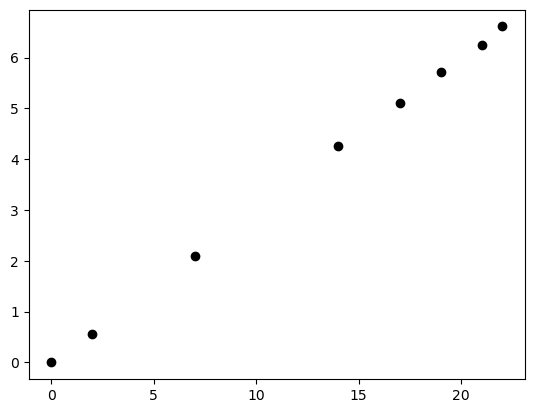

In [10]:
xydata["LogZ"] = np.log(xydata["Zombies"])     # np.log is "ln"; np.log10 is "log"
print(xydata)

plt.plot(xydata["Days"], xydata["LogZ"], "ko")
plt.show()

## Fit the Line

The statistical tools in *SciPy* can be used to perform a **curve fit** optimization. We will construct a **line** based on the parameters of the line fit and **display** that line on the same plot as the data. **Does it fit**? We can also report **statistical parameters** from the line fit calculation to help us with that decision. We will not use any statistics other than the parameters for the fit itself in this example. Consider the following code and determine what each command accomplishes. Did the linearized data fit the **linear function**?

**Note**: The `scipy.optimize.curve_fit()` function returns a list that contains a list of coefficients (your answers) and a matrix for the covariance (your statistical scores). The coefficients will follow the order that they are defined in the function used for the fit. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) for more information. 

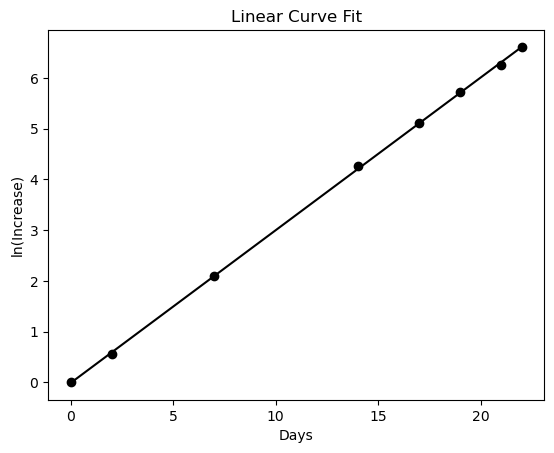

The slope (r-1) is 0.301 +/- 0.0032
Therefore the r value is 1.301 +/- 0.0032
The intercept is -0.009 +/- 0.048


In [11]:
def linear(x, m, b):      # Define a linear function
    return m * x + b
    
x, y = xydata["Days"], xydata["LogZ"]
    
[slope,intercept], covariance = opt.curve_fit(linear, x, y) 
     
plt.plot(x, y, "ko")   # plot the linear data

y_calc = linear(x ,slope, intercept)   # calculate y-values based on the curve fit parameters
plt.plot(x ,y_calc, "k-")             # plot the line for the curve fit parameters

plt.title("Linear Curve Fit")            # Title of the plot         
plt.xlabel("Days")                       # x-axis label   
plt.ylabel("ln(Increase)")               # y-axis label  

plt.show()

# the square root of the diagonization of the covariance matrix will give the stdev for the parameters
# recall your linear algebra and statistics courses, or just trust me.
[stdev_slope, stdev_int] = np.sqrt(np.diag(covariance))

print("The slope (r-1) is {:.3f} +/- {:.4f}".format(slope, 2*stdev_slope))
print("Therefore the r value is {:.3f} +/- {:.4f}".format(1+slope, 2*stdev_slope))
print("The intercept is {:.3f} +/- {:.3f}".format(intercept, 2*stdev_int))

## Fit the Line with Linear Regression
In the above code we used the `scipy.optimize.curve_fit()` function to **fit** an arbitrary function to data. This is a **general-purpose** method and works with any function. You may be familiar with Microsoft *Excel* and the need to fit **linear** data (unless you want to bother with the *solver* system of *Excel*). *Excel* uses a **linear regression** method. It is exactly the same as a **curve fit** but assumes that the function is always a linear *y = mx + b* system.

***SciPy*** has the same linear regression function. We can use the `scipy.stats.linregress()` function. We send it the *x,y* data and it returns an **object** that contains all the results, including standard **statistical information**. Consider the code below and examine the purpose of each command. 

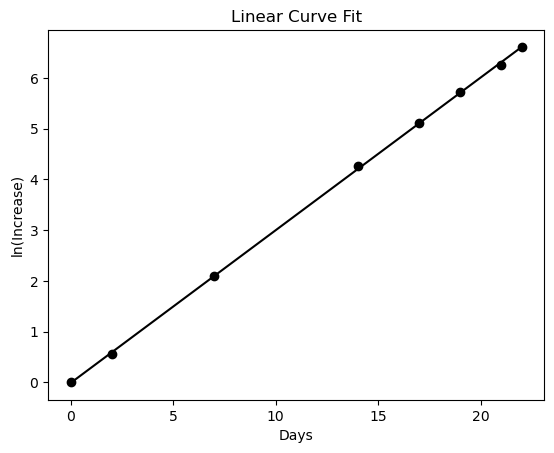

Slope = 0.30 +/- 0.0032
Intercept = -0.01 +/- 0.0482
RSQ = 1.000


In [12]:
x, y = xydata["Days"], xydata["LogZ"]

plt.plot(x, y, "ko")                           # plot the data

plt.title("Linear Curve Fit")                  # Title of the plot         
plt.xlabel("Days")                             # x-axis label   
plt.ylabel("ln(Increase)")                     # y-axis label  

fit = stats.linregress(x, y)                   # use linear regression to fit the data

y_calc = linear(x, fit.slope, fit.intercept)   # calculate y-values based on the curve fit parameters
plt.plot(x, y_calc, "k-")                      # plot the line for the curve fit parameters


plt.show()  

# print out the statistical information available from the linregress function

print("Slope = {:.2f} +/- {:.4f}".format(fit.slope, 2*fit.stderr))          
print("Intercept = {:.2f} +/- {:.4f}".format(fit.intercept, 2*fit.intercept_stderr))   
print("RSQ = {:.3f}".format(fit.rvalue**2))

## Fit the Curve

Linear fits are so "Excel". We can **fit the curve** function itself without needing to linearize the data.  This is more broadly applicable. However, I do recommend linearizing where possible because a subtle curve in what is supposed to be a straight line **stands out** to our human brains. We would see clearly that, even though the fit is close, the model is wrong. We would not pick up that slight difference in fitting a curve (is it slightly too curved?) and would need to use statistical analysis to detect such a **deviation from the model** (such as plotting the residuals - which you should always do, even with linear plots.)

All we have to do is use the **exact same** code block as above but with a different curve fit function. That is the power of these notebooks. **Cut and paste** is a useful tool here.

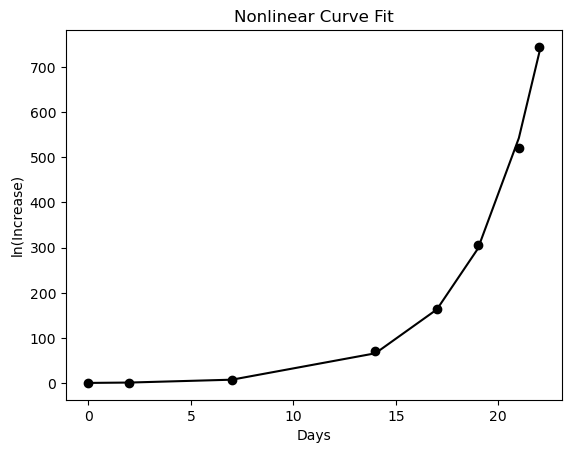

The replication factor, r, is 1.2998190918436157


In [13]:
def curve(x,r):      # Define a linear function
    return np.exp((r-1)*x)
 
x, y = xydata["Days"], xydata["Zombies"]    

[r], covariance = opt.curve_fit(curve, x, y) 
     
plt.plot(x, y, "ko")                     # plot the linear data

y_calc = curve(x ,r)                     # calculate y-values based on the curve fit parameters
plt.plot(x ,y_calc, "k-")                # plot the line for the curve fit parameters

plt.title("Nonlinear Curve Fit")         # Title of the plot         
plt.xlabel("Days")                       # x-axis label   
plt.ylabel("ln(Increase)")               # y-axis label  
plt.show()

print("The replication factor, r, is",r)


## Smoothing the Curve

Observe above that the curve is a **series of straight lines** connecting the data points calculated at the given values of the *x*-axis. To make a **smooth curve**, we should use many more points. We will make a set of *x*-values with 100 evenly spaced values between the minimum and maximum values of the data *x*-axis. Consider the following clode block and try to **understand** what each command does.

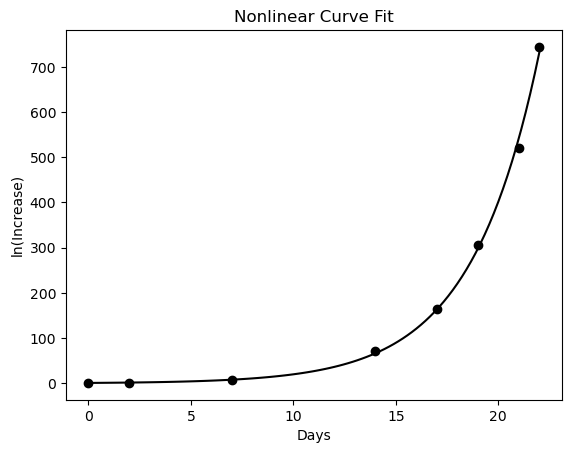

The replication factor, r, is 1.300 +/- 0.001
RSQ = 0.9987


In [14]:
def curve(x,r):                             # Define a linear function
    return np.exp((r-1)*x)
    
x, y = xydata["Days"], xydata["Zombies"]    

[r], covariance = opt.curve_fit(curve, x, y) 
     
plt.plot(x, y, "ko")                        # plot the linearized data

min_x = np.min(x)                           # get a starting value for the x_list
max_x = np.max(x)                           # get the ending value for the x_list
xlist = np.linspace(min_x,max_x,100)        # create an x-axis with many closely spaced values
ylist = curve(xlist,r)                      # calculate y-values based on the curve fit parameters
plt.plot(xlist, ylist, "k-")                # plot the smoother line for the curve fit parameters

plt.title("Nonlinear Curve Fit")            # Title of the plot         
plt.xlabel("Days")                          # x-axis label   
plt.ylabel("ln(Increase)")                  # y-axis label  
plt.show()

# the square root of the diagonization of the covariance matrix will give the stdev for the parameters
[stdev_r] = np.sqrt(np.diag(covariance))

# Calculate the square of the correlation for the line fit, R^2
corr_matrix = (np.corrcoef(y, y_calc))  
R = corr_matrix[0,1]
RSQ = R**2

# print out the statistical information calculated for this data
# note the use of the str.format() method to format the numeric data within the text strings
print("The replication factor, r, is {:.3f} +/- {:.3f}".format(r, 2*stdev_r))
print("RSQ = {:.4f}".format(RSQ))

## Plotting Residuals

We can **check the model** by plotting the **residuals**. This is the difference between the experimental *y*-axis and the calculated *y*-axis from the fit to the model. **Random error** will be distributed evenly obove and below zero. A systematic mismatch between the model and the data should be evident as a detectable trend in the plot. If it deviates from a random cloud then we may need to **revise our hypothesis**.

The plots below seems to have no systematic deviation from *y = 0* other than **random noise**. A perfect fit.

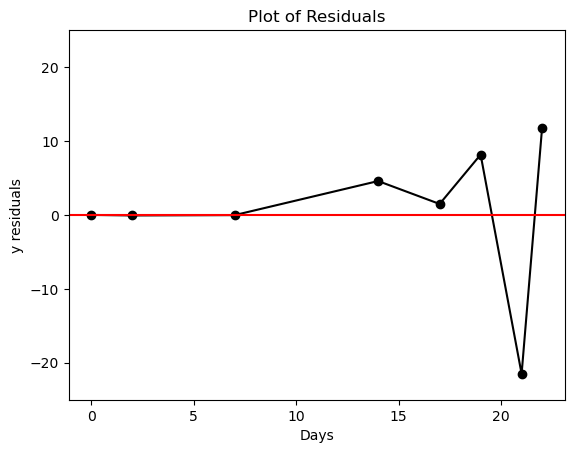

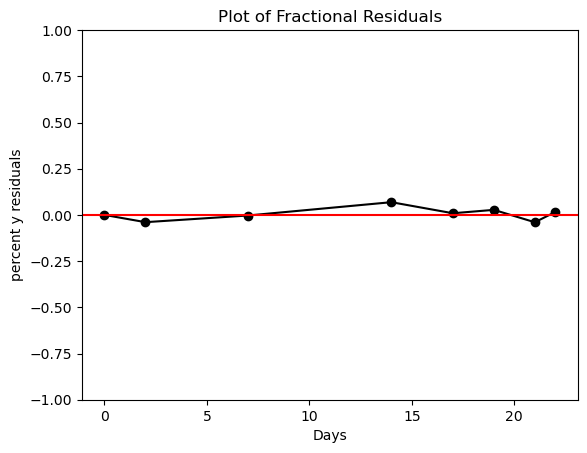

In [15]:
residuals = (y - y_calc)
plt.plot(x, residuals, "ko-")
plt.axhline(y=0, color='r', linestyle='-')
plt.ylim([-25, 25])
#plt.xlim([-20, 40])

plt.title("Plot of Residuals")                 
plt.xlabel("Days")                    
plt.ylabel("y residuals")             
plt.show()

percent_residuals = (y - y_calc)/y_calc
plt.plot(x, percent_residuals, "ko-")
plt.axhline(y=0, color='r', linestyle='-')
plt.ylim([-1, 1])
#plt.xlim([-5, 30])

plt.title("Plot of Fractional Residuals")                  
plt.xlabel("Days")                      
plt.ylabel("percent y residuals")         
plt.show()

## Summary

Our skills are complete. We can **plot** experimental data and **fit** that data to an arbitrary function. We can **visualize** the line fit and **evaluate** if our model is valid. We now have a block of code that can be **repurposed** in our experimental analyses. Choose one of these code blocks and use it as a **recipe** for plotting your experimental data. Write once, use many times - that is the way of *Python*.

### What We Have Accomplished

We have had an introduction to using ***NumPy*** with ***Python*** to give us a useful calculator; using ***Pandas*** to import and manipulate data as dataframes; using ***MatPlotLib*** to plot functions and experimental data; and using ***SciPy*** to optimize curve fits for model functions and to perform linear regression fits for linear functions.

### A Look Ahead

As we proceed through **exploring chemistry** using data analysis, we will see **new tools** and techniques introduced where appropriate. These will be useful and convenient but we can do, everything in this course using nothing more that the tools that we have already presented. *Python* with *NumPy*, *SciPy*, *Pandas* and *MatPlotLib* will be our **toolbox**. Let us move forward and continue to use data to understand chemical concepts whenever we can.

## Resources
The **data file** can be obtained from the resources section of the course **moodle** site. The contents of the file are displayed below so that you can make it yourself if you are unable to access moodle.

**data/2_3_Data.txt**
```
Days,Zombies
0,1.00
2,1.75
7,8.13
14,71.1
17,165
19,306
21,521
22,744
```
